<a href="https://colab.research.google.com/github/ojan9976/kinerja_siswa/blob/main/kinerja_siswa_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files


In [29]:
# 2. Upload File Excel
uploaded = files.upload()  # Pilih file "dataset.xlsx"


Saving dataset.xlsx to dataset (3).xlsx


In [30]:
# 3. Baca Dataset dan Siapkan Kolom
# Ganti header=4 jika nama kolom mulai dari baris ke-5
df = pd.read_excel("dataset.xlsx", header=4)

kolom_identitas = ['No', 'Nama', 'Kelas']
kolom_nilai = ['TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07', 'TP08']

# Filter kolom dan buang baris kosong
df = df[kolom_identitas + kolom_nilai].dropna()


In [34]:
# 4. Normalisasi Nilai
scaler = StandardScaler()
nilai_scaled = scaler.fit_transform(df[kolom_nilai])


In [37]:
inertias = []
silhouette_scores = []
range_n = range(2, 11)

for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(nilai_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(nilai_scaled, labels))


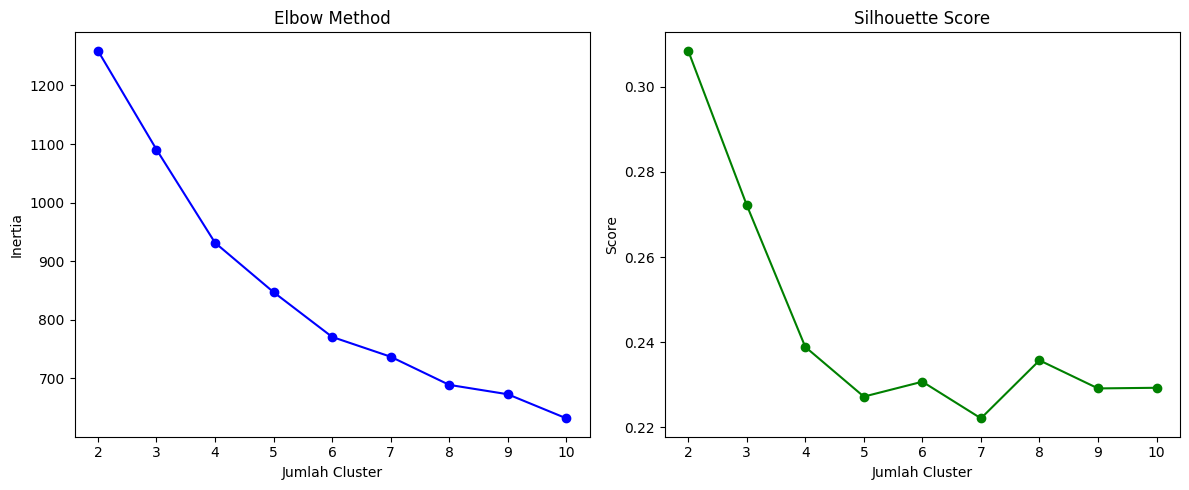

In [41]:
inertias = []
silhouette_scores = []
range_n = range(2, 11)

for n in range_n:
    kmeans_n = KMeans(n_clusters=n, random_state=42)
    labels = kmeans_n.fit_predict(nilai_scaled)
    inertias.append(kmeans_n.inertia_)
    silhouette_scores.append(silhouette_score(nilai_scaled, labels))

# Plot Elbow & Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n, inertias, 'bo-')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range_n, silhouette_scores, 'go-')
plt.title("Silhouette Score")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Score")

plt.tight_layout()
plt.show()



In [44]:
# 7. PCA untuk reduksi dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nilai_scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# 8. Visualisasi cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, edgecolor='black')
plt.title("Visualisasi Clustering K-Means (3 Cluster)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>